# Prediction Models

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor


## Load Data

In [2]:
df_teams = pd.read_csv("dataset/cleaned/teams.csv")
df_teams_post = pd.read_csv("dataset/cleaned/teams_post.csv")
df_series_post = pd.read_csv("dataset/cleaned/series_post.csv")
df_players = pd.read_csv("dataset/cleaned/players.csv")
df_players_teams = pd.read_csv("dataset/cleaned/players_teams.csv")
df_coaches = pd.read_csv("dataset/cleaned/coaches.csv")
df_awards_players = pd.read_csv("dataset/cleaned/awards_players.csv")


## Models

In [3]:
# ### dps vemos estaticas de rebounds, steals, blocks, turnovers, etc para prever as estatisticas da equipa no ano seguinte

# save year 2010
df_teams_2010 = df_teams[df_teams.year == 10]
# 
# 
# Vai depender muito do que eles nos dão para testarmos.... provavelmente só nos vão dar a composição das equipas e não estatisiticas de jogos
# 
# 

#drop where year equals 2010
df_teams = df_teams[df_teams.year != 10]
tmids = df_teams_2010['tmID']
confIds = df_teams_2010['confID']
df_teams = df_teams.drop(columns=['tmID', 'year', 'confID'], axis=1)
df_teams_2010 = df_teams_2010.drop(columns=['tmID', 'year', 'confID'], axis=1)
# remove year and tmID

X, Y = df_teams.drop(columns=['winPercentage'], axis=1), df_teams['winPercentage']

best_rf = RandomForestRegressor(n_estimators = 600,min_samples_split = 2,min_samples_leaf = 4,max_features = 'auto',max_depth = 40,bootstrap = True)
base_rf = RandomForestRegressor()
best_model = best_rf.fit(X, Y)
base_model = base_rf.fit(X, Y)


X_TEST = df_teams_2010.drop(columns=['winPercentage'], axis=1)
Y_TEST = df_teams_2010['winPercentage']


def mae(test,pred): # Mean absolute error 
    err = np.mean(abs(test-pred))
    return err
y_pred_base = base_model.predict(X_TEST)
y_pred_best = best_model.predict(X_TEST)
print('Mean absolute error (base rf model): {} '.format(mae(Y_TEST,y_pred_base)))
print('Mean absolute error (best rf model): {} '.format(mae(Y_TEST,y_pred_best)))
print(y_pred_base)
print(y_pred_best)

#add tmid again to df_teams_2010
df_teams_2010['tmID'] = tmids



# for every objet show the predicted winPercentage and the actual winPercentage
i=0
for index, row in df_teams_2010.iterrows():
    print(f"Team: {row['tmID']}\tPredicted winPercentage: {y_pred_best[i]}\tActual winPercentage: {row['winPercentage']}")
    i+=1


/home/m/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean absolute error (base rf model): 0.02182384615384603 
Mean absolute error (best rf model): 0.025300472305031706 
[0.53038 0.48016 0.45553 0.54747 0.62076 0.55263 0.46057 0.38032 0.67296
 0.32364 0.50492 0.57009 0.49588]
[0.53278379 0.45031056 0.437654   0.53642933 0.62308422 0.5375308
 0.46179078 0.38971727 0.66160518 0.3203016  0.50963263 0.56471131
 0.50568841]
Team: ATL	Predicted winPercentage: 0.532783790494228	Actual winPercentage: 0.529
Team: CHI	Predicted winPercentage: 0.4503105646434174	Actual winPercentage: 0.471
Team: CON	Predicted winPercentage: 0.43765399576784847	Actual winPercentage: 0.471
Team: DET	Predicted winPercentage: 0.5364293321965344	Actual winPercentage: 0.529
Team: IND	Predicted winPercentage: 0.6230842229169395	Actual winPercentage: 0.647
Team: LAS	Predicted winPercentage: 0.5375307957806081	Actual winPercentage: 0.529
Team: MIN	Predicted winPercentage: 0.46179078199346935	Actual winPercentage: 0.412
Team: NYL	Predicted winPercentage: 0.38971727094310904	

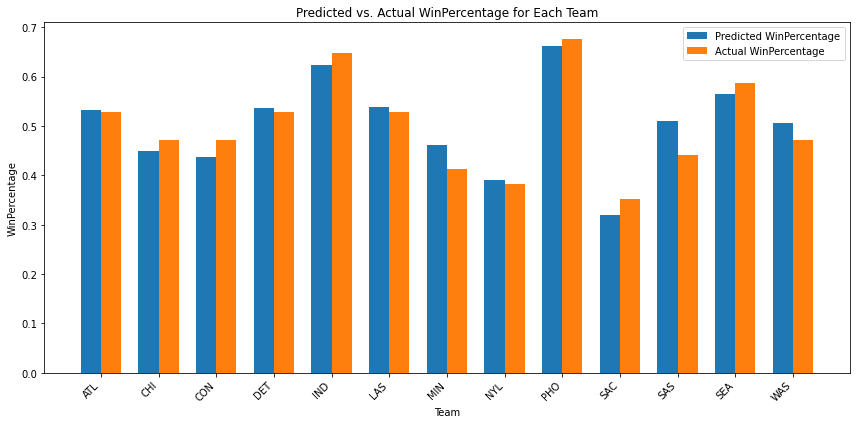

In [4]:
import matplotlib.pyplot as plt

# for every object, show the predicted winPercentage and the actual winPercentage
team_names = df_teams_2010['tmID'].tolist()
predicted_winPercentages = y_pred_best.tolist()
actual_winPercentages = df_teams_2010['winPercentage'].tolist()

# Create a bar plot to visualize the predicted and actual winPercentages
x = np.arange(len(team_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, predicted_winPercentages, width, label='Predicted WinPercentage')
bar2 = ax.bar(x + width/2, actual_winPercentages, width, label='Actual WinPercentage')

ax.set_xlabel('Team')
ax.set_ylabel('WinPercentage')
ax.set_title('Predicted vs. Actual WinPercentage for Each Team')
ax.set_xticks(x)
ax.set_xticklabels(team_names, rotation=45, ha='right')
ax.legend()

# Display the values on top of the bars
for i in range(len(team_names)):
    ax.annotate(f'{predicted_winPercentages[i]:.2f}', (x[i] - width/2, predicted_winPercentages[i] + 1), ha='center')
    ax.annotate(f'{actual_winPercentages[i]:.2f}', (x[i] + width/2, actual_winPercentages[i] + 1), ha='center')

plt.tight_layout()
plt.show()

In [5]:
#
#
# NOTE: This is tested against year 2009. It is able to predict the exact teams that made it to the playoffs because the dataset contains the playoff statistics features for that year.
#      However, the teacher won't probably give us the playoff statistics for the year 2010, so we will have to predict the teams that will make it to the playoffs based on other features.
#
#
#
# Make a prediction for the 2010 season
# say which teams will make it to the playoffs ... only four teams from each conference make it to the playoffs

df_teams_2010['confID'] = confIds

# add predWinPercentage to df_teams_2010
df_teams_2010['predWinPercentage'] = y_pred_best

ea_conf = df_teams_2010[df_teams_2010.confID == 'EA']
we_conf = df_teams_2010[df_teams_2010.confID == 'WE']


# get the top 4 teams from each conference
ea_conf = ea_conf.sort_values(by=['predWinPercentage'], ascending=False)
we_conf = we_conf.sort_values(by=['predWinPercentage'], ascending=False)


# print the teams that will make it to the playoffs

print("Eastern Conference")
for index, row in ea_conf.head(4).iterrows():
    print(f"{row['tmID']} with probality of {row['predWinPercentage']}")
print("Western Conference")
for index, row in we_conf.head(4).iterrows():
    print(f"{row['tmID']} with probality of {row['predWinPercentage']}")



Eastern Conference
IND with probality of 0.6230842229169395
DET with probality of 0.5364293321965344
ATL with probality of 0.532783790494228
WAS with probality of 0.5056884128256
Western Conference
PHO with probality of 0.6616051773165559
SEA with probality of 0.56471130988456
LAS with probality of 0.5375307957806081
SAS with probality of 0.5096326267615826


In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


def expanding_window_cross_validation(data, model_func, features, n_training_years):
    accuracy_results = []
    model = model_func()

    for i in range(1, n_training_years):
        train_data = data[data['year'].between(1, i)]
        test_data = data[data['year'] == (i + 1)]

        X_train, X_test = train_data[features], test_data[features]
        y_train, y_test = train_data['playoff'], test_data['playoff']

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results.append(accuracy)

    return accuracy_results, model


In [7]:
def expanding_window_decay_cross_validation(data, model_func, features, n_training_years, decay_rate=0.5):
    accuracy_results = []
    model = model_func()

    for i in range(1, n_training_years):
        train_data = data[data['year'].between(1, i)]
        test_data = data[data['year'] == (i + 1)]

        X_train, X_test = train_data[features], test_data[features]
        y_train, y_test = train_data['playoff'], test_data['playoff']

        # Apply weight to older data
        weight = decay_rate ** (n_training_years - i - 1)
        sample_weight = [weight] * len(X_train)

        if type(model_func()).__name__ in ["KNeighborsClassifier", "MLPClassifier"]:
            model.fit(X_train, y_train)  # This model don't support sample weights
        else:
            model.fit(X_train, y_train, sample_weight=sample_weight)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results.append(accuracy)

    return accuracy_results, model


In [8]:
def sliding_window_cross_validation(data, model_func, features, n_training_years, window_size):
    accuracy_results = []
    model = model_func()

    for i in range(1, n_training_years - window_size + 1):
        train_data = data[data['year'].between(i, i + window_size - 1)]
        test_data = data[data['year'] == (i + window_size)]

        X_train, X_test = train_data[features], test_data[features]
        y_train, y_test = train_data['playoff'], test_data['playoff']

        # print(F"Window train: {train_data['year'].unique()}\nWindow test: {test_data['year'].unique()}\n")
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results.append(accuracy)

    return accuracy_results, model


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Define a list of lambda functions for different models with hyperparameters
models = [
    lambda: RandomForestClassifier(n_estimators=100, random_state=42),
    #lambda: LogisticRegression(max_iter=1000, random_state=42),
    lambda: SVC(C=1.0, kernel='rbf', probability=True),
    lambda: GaussianNB(),
    lambda: KNeighborsClassifier(n_neighbors=5),
    lambda: DecisionTreeClassifier(max_depth=5, random_state=42),
    lambda: GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    lambda: MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
]

In [10]:

wnba_data = pd.read_csv("dataset/cleaned/teams.csv")
n_training_years = 9 # 9 years of data and 1 year to predict

# Selecting the features and target
features = ['attend','RoundReached','o_oreb', 'o_dreb', 'o_pf', 'o_stl', 'o_blk', 'o_pts', 'd_oreb', 'd_dreb', 'd_asts', 'd_pf', 'd_to', 'd_blk', 'd_pts', 'min', 'attend', 'RoundReached',
            'winPercentage', 'homeWinPercentage', 'awayWinPercentage', 'of_goal', 'of_3pt', 'of_throw', 'of_reb', 'of_assist', 'df_goal', 'df_3pt', 'df_throw', 'df_reb', 'df_steal']


In [11]:
for model in models:
    accuracy_results, final_model = expanding_window_cross_validation(
        wnba_data, model, features, n_training_years)

    avg = round(sum(accuracy_results) / len(accuracy_results), 2)

    print(f"=====================================")
    print("Model name:", type(model()).__name__)
    print("Accuracy results for each iteration:",
          [round(x, 2) for x in accuracy_results])
    print("Average accuracy:", avg)

print("=====================================")


Model name: RandomForestClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: SVC
Accuracy results for each iteration: [0.56, 0.75, 0.21, 0.69, 0.62, 0.64, 0.69, 0.64]
Average accuracy: 0.6
Model name: GaussianNB
Accuracy results for each iteration: [0.81, 0.94, 0.43, 0.85, 0.85, 0.71, 0.85, 1.0]
Average accuracy: 0.8
Model name: KNeighborsClassifier
Accuracy results for each iteration: [0.56, 0.62, 0.5, 0.92, 0.38, 0.43, 0.46, 0.57]
Average accuracy: 0.56
Model name: DecisionTreeClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: GradientBoostingClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: MLPClassifier
Accuracy results for each iteration: [0.5, 0.5, 0.57, 0.62, 0.62, 0.57, 0.62, 0.57]
Average accuracy: 0.57


In [12]:
for model in models:
    accuracy_results, final_model = expanding_window_decay_cross_validation(
        wnba_data, model, features, n_training_years)

    avg = round(sum(accuracy_results) / len(accuracy_results), 2)

    print(f"=====================================")
    print("Model name:", type(model()).__name__)
    print("Accuracy results for each iteration:",
          [round(x, 2) for x in accuracy_results])
    print("Average accuracy:", avg)

print("=====================================")


Model name: RandomForestClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: SVC
Accuracy results for each iteration: [0.56, 0.75, 0.21, 0.62, 0.62, 0.57, 0.69, 0.64]
Average accuracy: 0.58
Model name: GaussianNB
Accuracy results for each iteration: [0.81, 0.94, 0.43, 0.85, 0.85, 0.71, 0.85, 1.0]
Average accuracy: 0.8
Model name: KNeighborsClassifier
Accuracy results for each iteration: [0.56, 0.62, 0.5, 0.92, 0.38, 0.43, 0.46, 0.57]
Average accuracy: 0.56
Model name: DecisionTreeClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: GradientBoostingClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: MLPClassifier
Accuracy results for each iteration: [0.5, 0.5, 0.57, 0.62, 0.62, 0.57, 0.62, 0.57]
Average accuracy: 0.57


In [13]:
for model in models:
    accuracy_results, final_model = sliding_window_cross_validation(
        wnba_data, model, features, n_training_years, 3)

    avg = round(sum(accuracy_results) / len(accuracy_results), 2)

    print(f"=====================================")
    print("Model name:", type(model()).__name__)
    print("Accuracy results for each iteration:",
          [round(x, 2) for x in accuracy_results])
    print("Average accuracy:", avg)

print("=====================================")


Model name: RandomForestClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: SVC
Accuracy results for each iteration: [0.21, 0.62, 0.62, 0.57, 0.69, 0.64]
Average accuracy: 0.56
Model name: GaussianNB
Accuracy results for each iteration: [0.43, 0.69, 0.69, 0.71, 0.69, 1.0]
Average accuracy: 0.7
Model name: KNeighborsClassifier
Accuracy results for each iteration: [0.5, 0.77, 0.46, 0.57, 0.54, 0.71]
Average accuracy: 0.59
Model name: DecisionTreeClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: GradientBoostingClassifier
Accuracy results for each iteration: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 1.0
Model name: MLPClassifier
Accuracy results for each iteration: [0.57, 0.62, 0.62, 0.57, 0.38, 0.57]
Average accuracy: 0.55
